In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [7]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [10]:
0.544554 + 0.455446

1.0

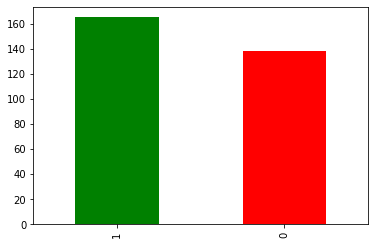

In [11]:
df.target.value_counts().plot(kind="bar", color=["g", "r"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


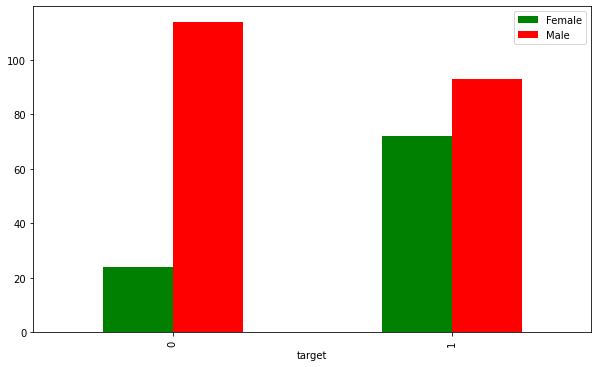

In [15]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["g", "r"], figsize=(10,6))
plt.legend(["Female", "Male"]);

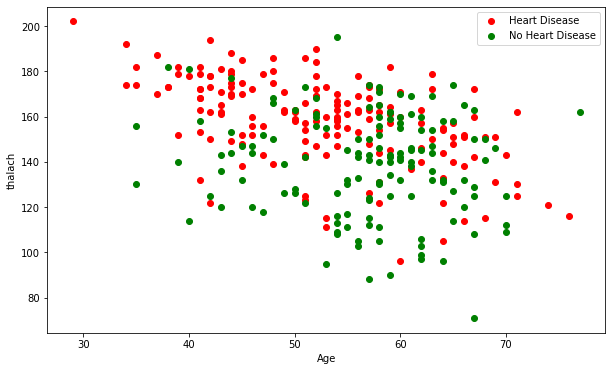

In [16]:

plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="r")

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="g");

plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("thalach");

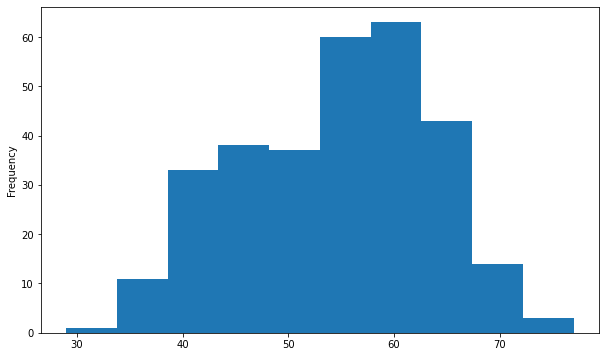

In [17]:
plt.figure(figsize=(10,6))
df.age.plot.hist();

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


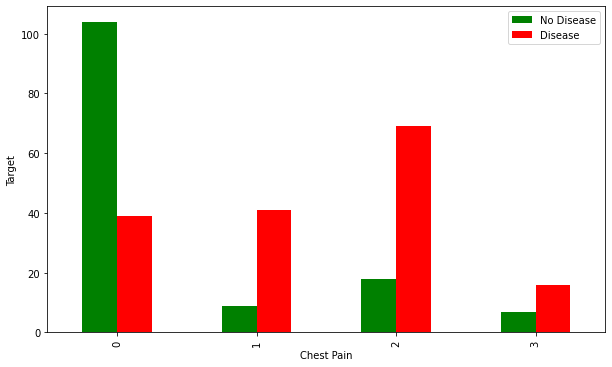

In [19]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=("g", "r"), figsize=(10, 6))
plt.legend(["No Disease", "Disease"]);
plt.xlabel("Chest Pain")
plt.ylabel("Target");

In [20]:
corr_metric = df.corr()
corr_metric

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


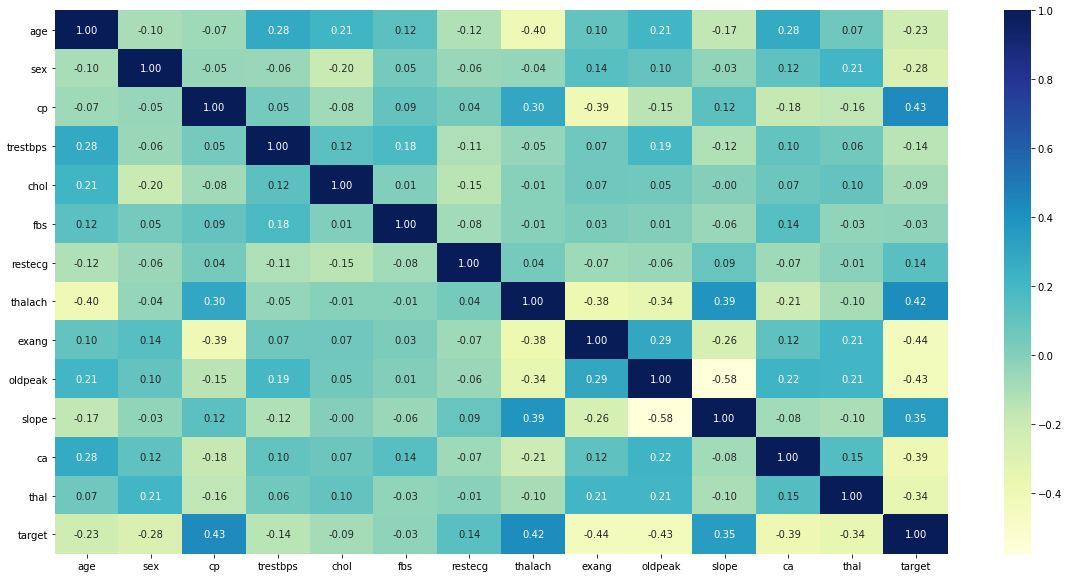

In [21]:
plt.figure(figsize=(20, 10))

sns.heatmap(corr_metric,
           annot=True,
           fmt=".2f",
          cmap="YlGnBu");

In [22]:
x=df.drop("target", axis=1)
y=df["target"]


np.random.seed(2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
models={"KNN" : KNeighborsClassifier(),
       "LR" : LogisticRegression(),
       "RF" : RandomForestClassifier()}

In [26]:
def model_fit(model, x_train, x_test, y_train, y_test):
    np.random.seed(2)
    scores={}
    for name, model in models.items():
        model.fit(x_train, y_train)
        scores[name]=model.score(x_test, y_test)
    return scores

In [27]:
model_scores=model_fit(models, x_train, x_test,  y_train, y_test)
model_scores

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7049180327868853, 'LR': 0.9016393442622951, 'RF': 0.9016393442622951}

<AxesSubplot:>

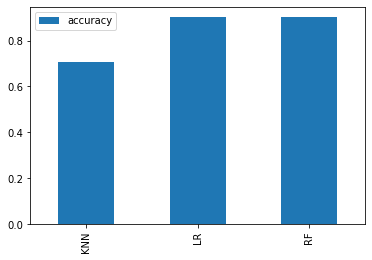

In [28]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [29]:
train_score=[]

test_score=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))


In [30]:
train_score

[1.0,
 0.7892561983471075,
 0.7396694214876033,
 0.7355371900826446,
 0.7396694214876033,
 0.7396694214876033,
 0.7231404958677686,
 0.7107438016528925,
 0.7066115702479339,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7024793388429752,
 0.6859504132231405,
 0.6735537190082644,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6735537190082644]

In [31]:
test_score

[0.6065573770491803,
 0.639344262295082,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885]

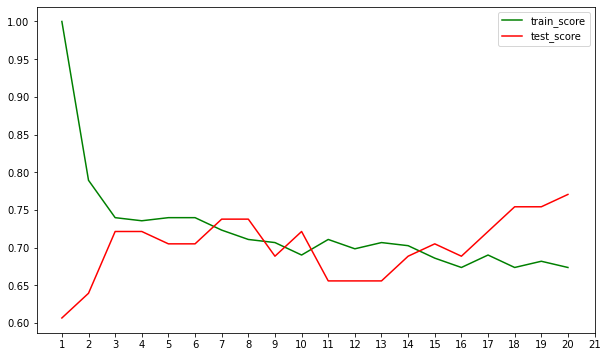

In [32]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_score, color="g")
plt.plot(neighbors, test_score, color="r")
plt.xticks(np.arange(1,22,1));
plt.legend(["train_score", "test_score"]);

In [33]:
log_reg_grid={"C" : np.logspace(-4, 4, 20),
             "solver":["liblinear"]}

rf_grid={"n_estimators" : (10, 1000, 50),
        "max_depth" : [None, 3, 5, 10],
        "min_samples_split" : np.arange(2, 20, 2),
        "min_samples_leaf" : np.arange(1,20,2)}

In [34]:
np.random.seed(2)

rs_log_grid = RandomizedSearchCV(LogisticRegression(),
                                 verbose=True,
                                n_iter=20,
                                param_distributions=log_reg_grid,
                                cv=5)
rs_log_grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_grid.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_grid.score(x_test, y_test)

0.9180327868852459

In [37]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rf_grid,
                       cv=5,
                       verbose=True,
                       n_iter=5)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': (10, 1000, 50)},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 18,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [39]:
rs_rf.score(x_test, y_test)

0.9016393442622951

In [45]:
log_reg_grid={"C" : np.logspace(-4, 4, 20),
             "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         verbose=True,
                         cv=5,
                         param_grid=log_reg_grid)

In [46]:
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [48]:
gs_log_reg.score(x_test, y_test)

0.9180327868852459

In [49]:
y_preds = gs_log_reg.predict(x_test)

In [50]:
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

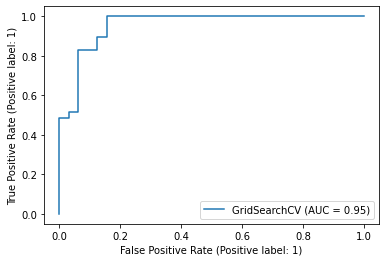

In [57]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gs_log_reg, x_test, y_test);

In [60]:
confusion_matrix(y_test, y_preds)

array([[27,  5],
       [ 0, 29]], dtype=int64)

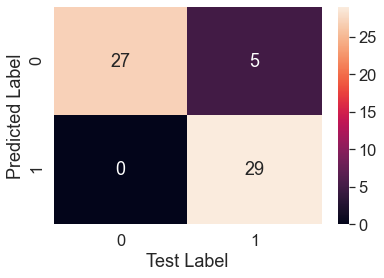

In [70]:
sns.set(font_scale=1.5)


sns.heatmap(confusion_matrix(y_test, y_preds),
           annot=True)
plt.xlabel("Test Label")
plt.ylabel("Predicted Label");

In [71]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



In [72]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [74]:
clf=LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [83]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [84]:
cv_acc = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [85]:
cv_pre = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring="precision")

cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [86]:
cv_rec = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring="recall")

cv_rec=np.mean(cv_rec)
cv_rec

0.9272727272727274

In [87]:
cv_f1 = cross_val_score(clf, 
                        x,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

In [90]:
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                         "Recall" : cv_rec,
                         "Precision" : cv_pre,
                         "F1" : cv_f1}, index=[0])

cv_metrics

,Accuracy,Recall,Precision,F1
0,0.847978,0.927273,0.821587,0.87054


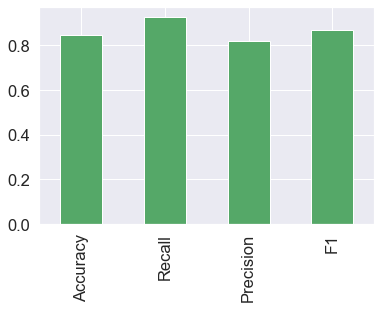

In [103]:
cv_metrics.T.plot(kind="bar", color = "g", legend=False);

In [104]:
clf.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [105]:
clf.coef_

array([[ 0.00934461, -0.97785887,  0.70381049, -0.01330768, -0.00310597,
        -0.04704671,  0.34835394,  0.02484814, -0.50829555, -0.40765952,
         0.45053221, -0.58411256, -0.58737263]])

In [107]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.009344609084876254,
 'sex': -0.977858870657503,
 'cp': 0.7038104866651775,
 'trestbps': -0.013307679531216358,
 'chol': -0.003105973177397002,
 'fbs': -0.047046710004145786,
 'restecg': 0.34835393892223726,
 'thalach': 0.024848144874640272,
 'exang': -0.508295553314441,
 'oldpeak': -0.40765951586300936,
 'slope': 0.45053221446411534,
 'ca': -0.5841125617567873,
 'thal': -0.5873726342651927}

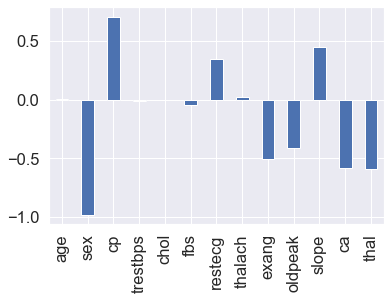

In [113]:
pd.DataFrame(feature_dict, index=[0]).T.plot(kind="bar", legend=False);